In [1]:
#importing the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data set
hr_data = pd.read_csv('HR_capstone_dataset.csv')
df = hr_data.copy() #copying the dataset to df
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [4]:
df = df.rename(columns = {'time_spend_company' : 'tenure'}) #renaming the columns
df.columns = df.columns.str.lower() #converting the all column names to lower case
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df.isna().sum() #checking for null values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [9]:
df[df.duplicated()] #displaying the duplicated columns

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
df.drop_duplicates(inplace = True) #droping the dupicated column

In [11]:
df.duplicated().sum() #conforming that all duplicated columns are droped 

0

In [12]:
df = df.reset_index(drop = True ) #reseting the index after droping duplicates
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


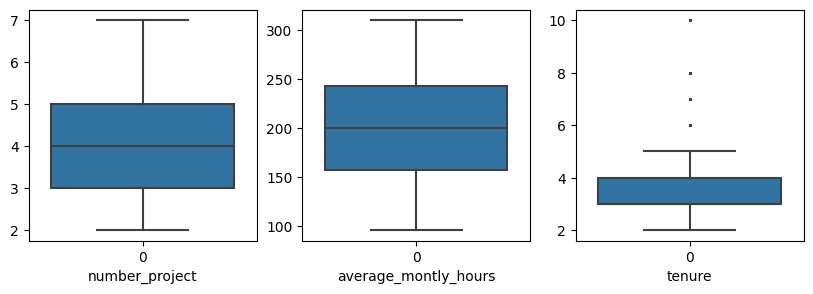

In [13]:
outlier_check_column = ['number_project' , 'average_montly_hours' , 'tenure'] #list of column to check for outliers

fig , axes = plt.subplots(1,3 , figsize = (10,3)) #creating 3 subplots
ax_num = 0
for column in outlier_check_column:
    sns.boxplot(df[column] , ax = axes[ax_num] , fliersize = 1)
    axes[ax_num].set_xlabel(column) 
    ax_num +=1
plt.show()

In [14]:
def outlier_check(df , column_list):
    for column in column_list:
        '''
        
        this function will check for outliers in the list of columns
        args:
            Data Frame : name of the dataframe
            column list(list) : column name to check for outliers (must be in list type)
        return
            column name with no of column containing outliers
            
        '''
        
        percentile25 = df[column].quantile(.25)
        percentile75 = df[column].quantile(.75)
        
        iqr = percentile75 - percentile25
        
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
        
        length = len(df[(df[column] > upper_limit) | (df[column] < lower_limit)])
        
        print(f'{column} : {length} columns containing outliers')
        return

In [15]:
outlier_check ( df , ['tenure'])

tenure : 824 columns containing outliers


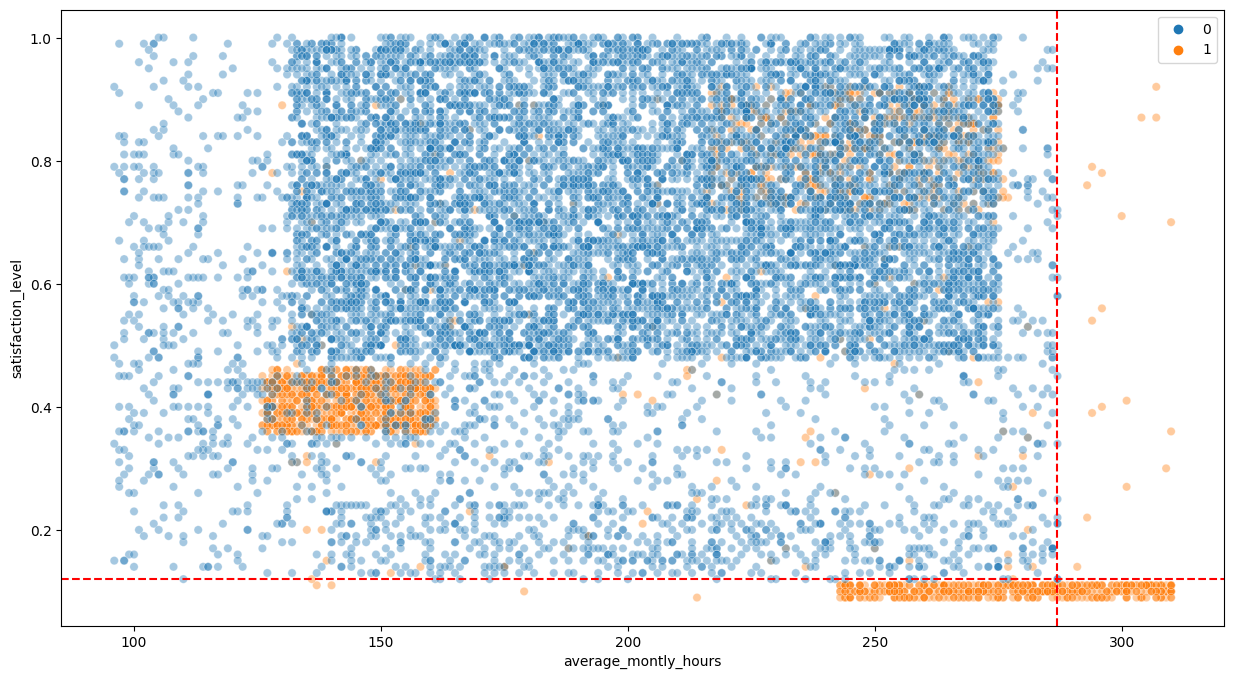

In [16]:
max_average_hour_non_left = df[df['left'] == 0]['average_montly_hours'].max() #max average hours for non left employees
min_satisfaction_level_non_left = df[df['left'] == 0]['satisfaction_level'].min() #min satisfaction level for non left employees

plt.figure(figsize = (15,8))
sns.scatterplot(data = df , x = 'average_montly_hours' , y = 'satisfaction_level' , hue = 'left' , alpha = .4)
plt.axvline(max_average_hour_non_left , linestyle = '--' , color = 'r'  )
plt.axhline(min_satisfaction_level_non_left , linestyle = '--' , color = 'r' )
plt.legend()
plt.show()

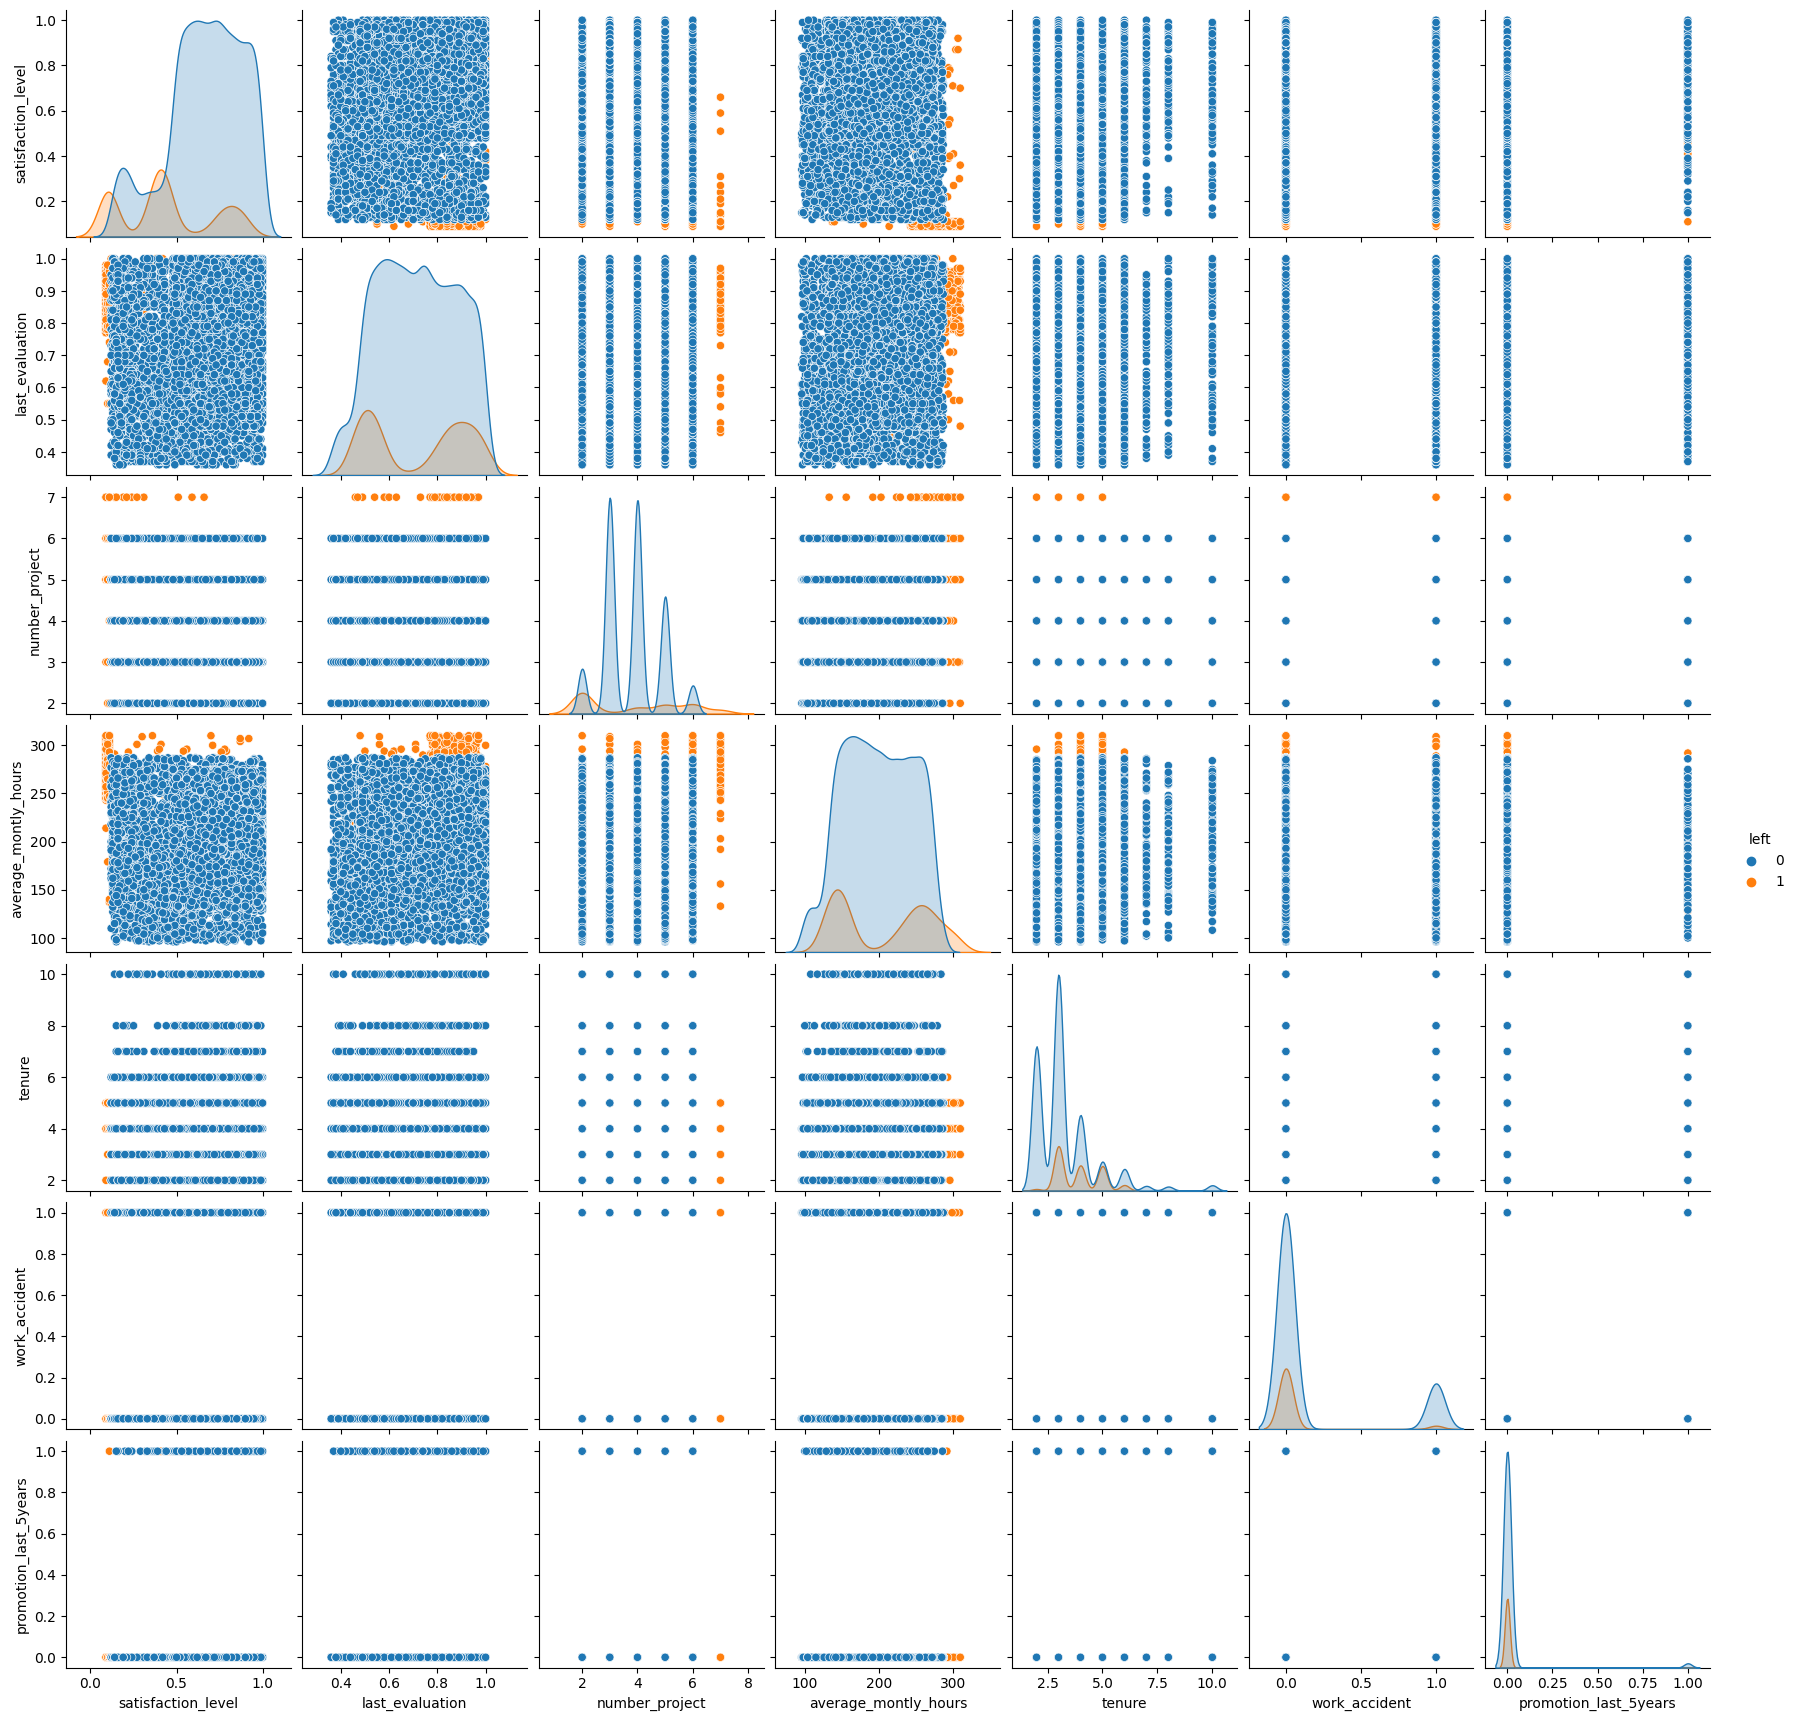

In [17]:
sns.pairplot(df  , hue = 'left') #pair plot

<Axes: xlabel='number_project', ylabel='satisfaction_level'>

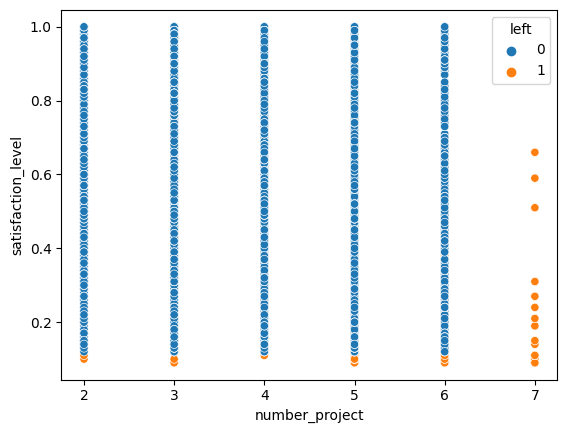

In [18]:
sns.scatterplot(data = df , x ='number_project' , y =  'satisfaction_level' , hue = 'left')

In [19]:
df[df['number_project'] == 7]['satisfaction_level'].max()

0.66

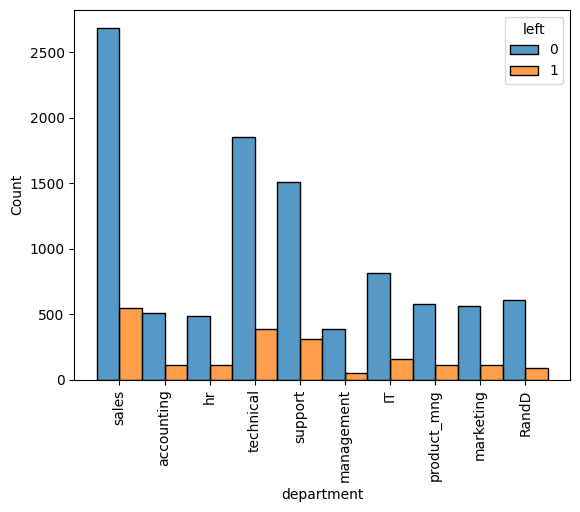

In [20]:
sns.histplot(data = df , x = 'department' , hue = 'left' ,multiple = 'dodge' ,shrink = 1)
plt.xticks(rotation = 90)
plt.show()

In [21]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [22]:
df['department'] = df['department'].astype('category').cat.codes #converting department column to numeric
df['salary'] = df['salary'].astype('category').cat.codes #converting salary column to numeric

In [23]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,4,0
11987,0.74,0.95,5,266,10,0,0,1,4,0
11988,0.85,0.54,3,185,10,0,0,1,4,0
11989,0.33,0.65,3,172,10,0,0,1,5,0


In [24]:
x = df.drop(['left'], axis = 1)
y = df['left'] #setting target variable

In [25]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [26]:
y.value_counts(normalize = True)*100 #there is class imbalance

left
0    83.39588
1    16.60412
Name: proportion, dtype: float64

In [27]:
y.value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

# ML Model 

# LogisticRegression 

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,make_scorer

<Axes: >

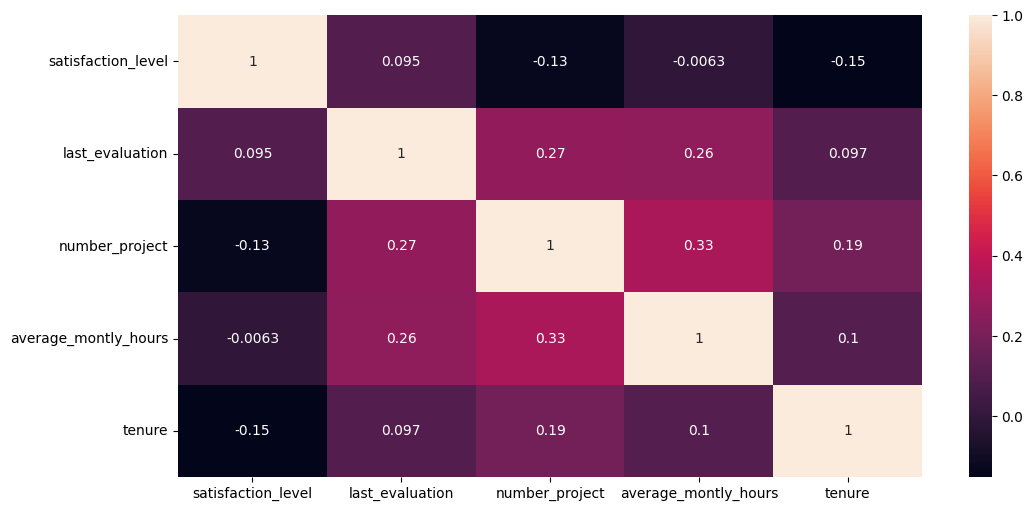

In [29]:
plt.figure(figsize = (12,6))
sns.heatmap(x[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'tenure']].corr(), annot=True)

# there is no multicollinearity  

In [30]:
from imblearn.over_sampling import RandomOverSampler
 
ros = RandomOverSampler(random_state=42)

# Upsample the minority class
X_upsampled, y_upsampled = ros.fit_resample(x, y)


In [31]:
#spliting the train and test data
x_train , x_test , y_train ,y_test  = train_test_split( X_upsampled, y_upsampled, test_size = .25 , stratify = y_upsampled)

#sclaing the x data
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

#fiting the scaled data into to the model
model_log = LogisticRegression()
model_log.fit(x_train_sc , y_train )


LogisticRegression()

In [32]:
#predicting the test data
y_predit_log = model_log.predict(x_test_sc)
#confussion matrix
log_cm = confusion_matrix(y_test, y_predit_log, labels=model_log.classes_)
log_cm

array([[1909,  591],
       [ 415, 2085]], dtype=int64)

<Axes: >

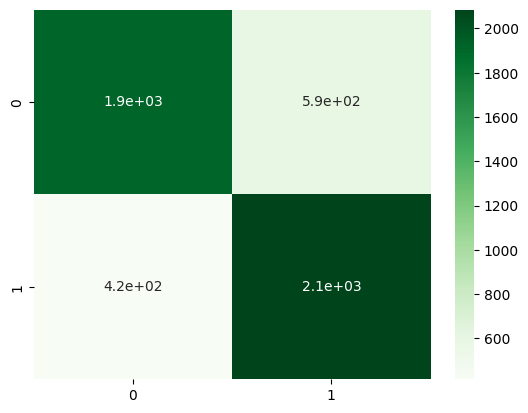

In [33]:
#heatmap for confusion matrix
sns.heatmap(log_cm , annot = True , cmap= 'Greens')

In [34]:
#creating the list in order to store values for creating the dataframe to measure various model performance
model = []
Accuracy_score = []
Precision_score = []
Recall_score = []
F1_score = []

In [35]:
#appending the model name to model list
model.append('Logistics Regression')

#calculating the accuracy score and appending the same to relavent list
accuracy_score_log = accuracy_score(y_test, y_predit_log)
print(accuracy_score_log)
Accuracy_score.append(accuracy_score_log)

precision_score_log = precision_score(y_test , y_predit_log)
print(precision_score_log)
Precision_score.append(precision_score_log)

recall_score_log = recall_score(y_test , y_predit_log)
print(recall_score_log)
Recall_score.append(recall_score_log)

f1_score_log = f1_score(y_test , y_predit_log)
print(f1_score_log)
F1_score.append(f1_score_log)

0.7988
0.7791479820627802
0.834
0.8056414219474497


<Axes: >

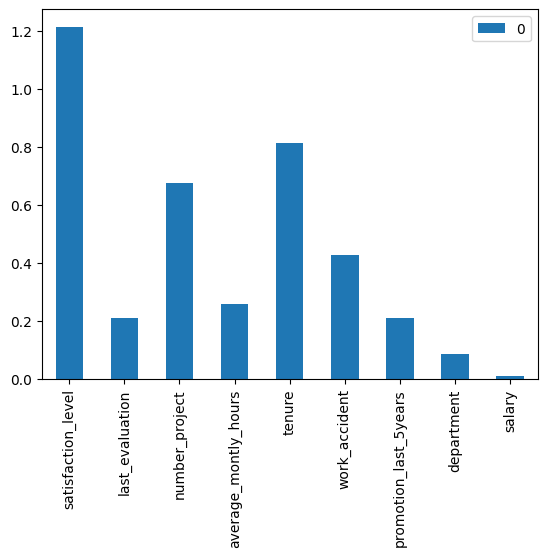

In [36]:
#importance columns for logistics regression to predict
coefficients = model_log.coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame(avg_importance , index = x.columns)
feature_importance.plot.bar()

In [37]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [38]:
dtc = DecisionTreeClassifier()

#defining the hyper parameter for Gridsearch 
cv_params = {'max_depth' : [4,5,6,7,8,10,15,20,None],
            'min_samples_leaf' : [1,2,3,4,5,10,None]}
scoring = {'accuracy', 'precision', 'recall', 'f1'}
dtc_cv = GridSearchCV(dtc , cv_params , cv = 5,scoring = scoring , refit = 'f1')

In [39]:
%%time
#fiting the data to DecisionTreeclassifier
dtc_cv.fit(x_train , y_train)

CPU times: total: 22.8 s
Wall time: 24.7 s


C:\Users\KAVIN PRADEEP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 315.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KAVIN PRADEEP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KAVIN PRADEEP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\KAVIN PRADEEP\AppData\Local\Programs\Python\Python310\lib\site-pac

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, None]},
             refit='f1', scoring={'f1', 'precision', 'accuracy', 'recall'})

In [40]:
#evalating the best params and best score
dtc_cv.best_params_
dtc_cv.best_score_

0.98485838416778

In [41]:
#assiging the best estimator to dtc_best 
dtc_best = dtc_cv.best_estimator_

In [42]:
dtc_best.fit(x_train , y_train)

DecisionTreeClassifier()

In [43]:
#predicting the x test for model DecisionTree
dtc_predit = dtc_best.predict(x_test)

In [44]:
#evaluting the model performance
accuracy_score_dtc = accuracy_score(y_test, dtc_predit)
print(accuracy_score_dtc)
precision_score_dtc = precision_score(y_test , dtc_predit)
print(precision_score_dtc)
recall_score_dtc = recall_score(y_test , dtc_predit)
print(recall_score_dtc)
f1_score_dtc = f1_score(y_test , dtc_predit)
print(f1_score_dtc)

0.9868
0.975390625
0.9988
0.9869565217391305


In [45]:
#confusion metrix for DecisionTree
dtc_cm = confusion_matrix(y_test, dtc_predit, labels=model_log.classes_)
dtc_cm

array([[2437,   63],
       [   3, 2497]], dtype=int64)

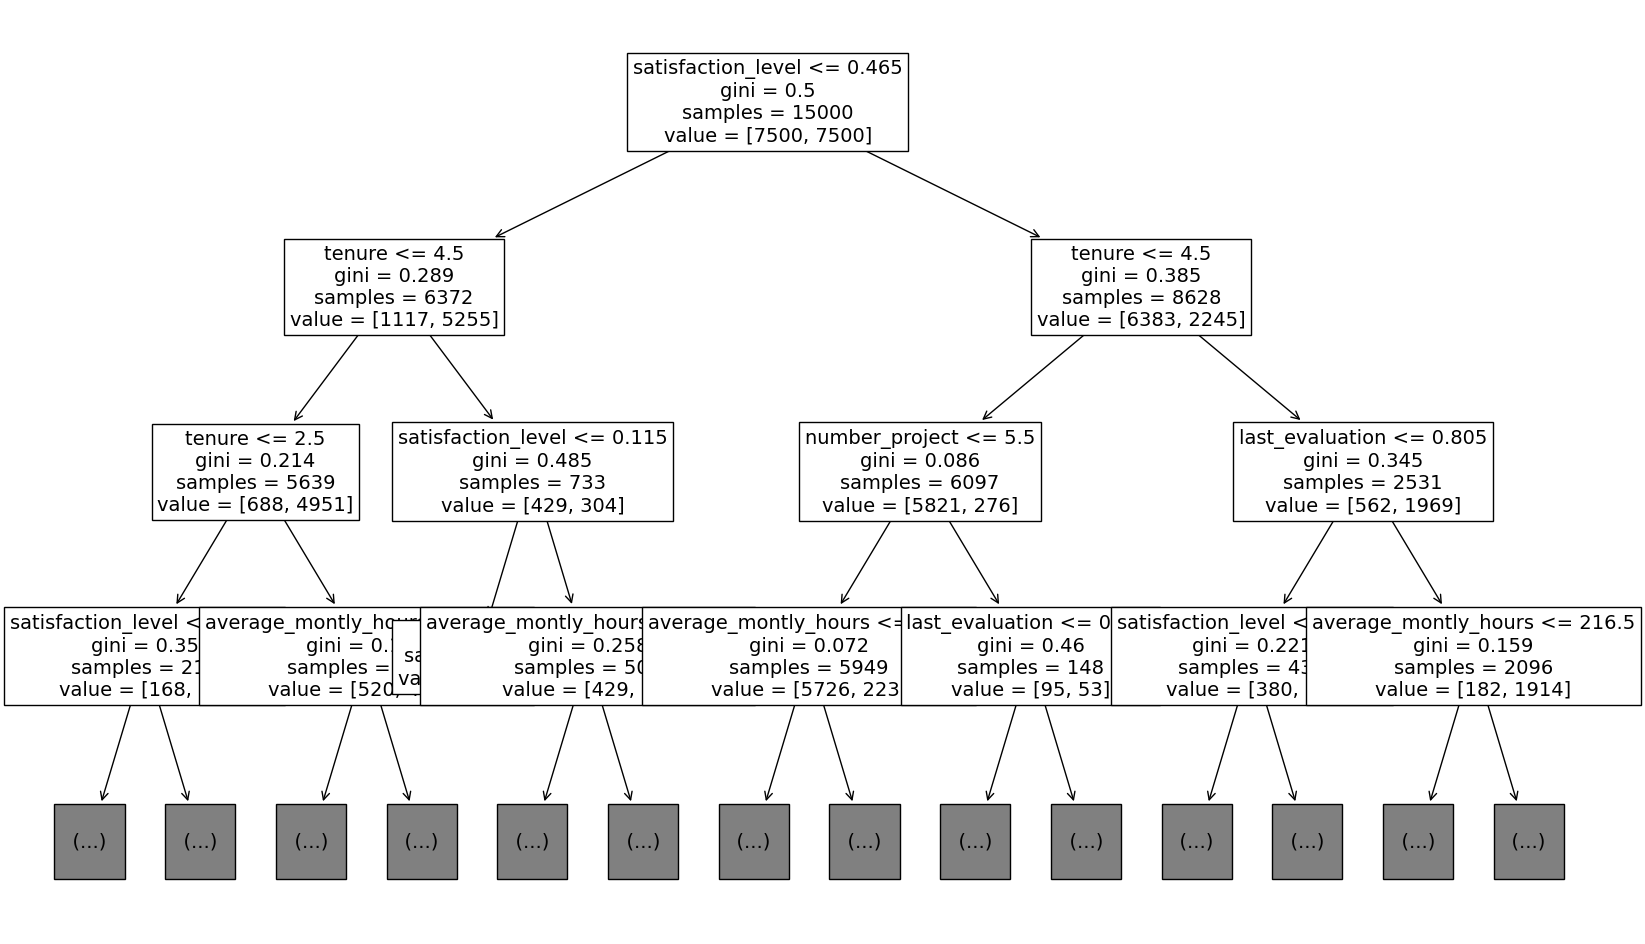

In [46]:
#DecisionTree plot tree
plt.figure(figsize=(20, 12))
plot_tree(dtc_best, max_depth=3, fontsize=14, feature_names=x.columns)
plt.show()

<Axes: xlabel='index'>

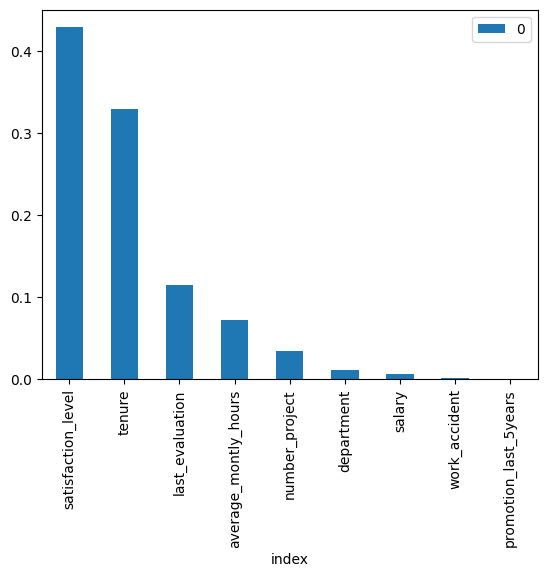

In [47]:
#important feature for Decision tree in order to predict 
dtc_importances = dtc_best.feature_importances_

dtc_importances = pd.Series(dtc_importances, index=x.columns)
dtc_importances.reset_index().set_index('index').sort_values(by = 0 , ascending = False).plot.bar()

In [48]:
#appending the model name to model list
model.append('Decision Tree Classifier')

#calculating the accuracy score and appending the same to relavent list
accuracy_score_dtc = accuracy_score(y_test, dtc_predit)
print(f'accuracy_score : {accuracy_score_dtc}')
Accuracy_score.append(accuracy_score_dtc)

precision_score_dtc = precision_score(y_test , dtc_predit)
print(f'precision_score : {precision_score_dtc}')
Precision_score.append(precision_score_dtc)

recall_score_dtc = recall_score(y_test , dtc_predit)
print(f'recall_score : {recall_score_dtc}')
Recall_score.append(recall_score_dtc)

f1_score_dtc = f1_score(y_test , dtc_predit)
print(f'f1_score : {f1_score_dtc}')
F1_score.append(f1_score_dtc)

accuracy_score : 0.9868
precision_score : 0.975390625
recall_score : 0.9988
f1_score : 0.9869565217391305


# Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier()

In [51]:
cv_params = {'max_depth' : [4,5,6,8,10,15,20,25,30,50,None],
            'n_estimators' : [25,50],
            'min_samples_leaf':[5,10,15,20,None],
             'max_samples' :[.5,.9]}


In [52]:
rfc_cv = GridSearchCV(rfc , cv_params , cv = 5 , scoring = scoring , refit = 'f1')

In [53]:
%%time
rfc_cv.fit(x_train , y_train)

C:\Users\KAVIN PRADEEP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
220 fits failed out of a total of 1100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
220 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KAVIN PRADEEP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KAVIN PRADEEP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\KAVIN PRADEEP\AppData\Local\Programs\Python\Pytho

CPU times: total: 8min 7s
Wall time: 8min 24s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 8, 10, 15, 20, 25, 30, 50,
                                       None],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [5, 10, 15, 20, None],
                         'n_estimators': [25, 50]},
             refit='f1', scoring={'f1', 'precision', 'accuracy', 'recall'})

In [54]:
print(rfc_cv.best_estimator_)
print(rfc_cv.best_score_)

RandomForestClassifier(max_depth=20, max_samples=0.9, min_samples_leaf=5,
                       n_estimators=25)
0.9759431871872298


In [55]:
rfc_best = rfc_cv.best_estimator_

In [56]:
rfc_best.fit(x_train , y_train)

RandomForestClassifier(max_depth=20, max_samples=0.9, min_samples_leaf=5,
                       n_estimators=25)

In [57]:
rfc_predict = rfc_best.predict(x_test)

<Axes: >

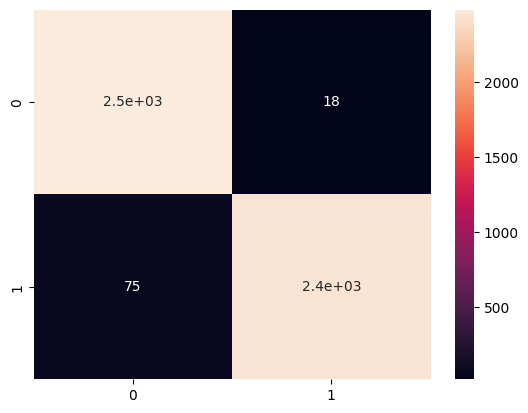

In [58]:
rfc_cm = confusion_matrix(y_test, rfc_predict)
rfc_cm

sns.heatmap(rfc_cm , annot=True)

In [59]:
#appending the model name to model list
model.append('Random Forest Classifier')

#calculating the accuracy score and appending the same to relavent list
accuracy_score_rfc = accuracy_score(y_test, rfc_predict)
print(f'accuracy_score : {accuracy_score_rfc}')
Accuracy_score.append(accuracy_score_rfc)

precision_score_rfc = precision_score(y_test , rfc_predict)
print(f'precision_score : {precision_score_rfc}')
Precision_score.append(precision_score_rfc)

recall_score_rfc = recall_score(y_test , rfc_predict)
print(f'recall_score : {recall_score_rfc}')
Recall_score.append(recall_score_rfc)

f1_score_rfc = f1_score(y_test , rfc_predict)
print(f'f1_score : {f1_score_rfc}')
F1_score.append(f1_score_rfc)

accuracy_score : 0.9814
precision_score : 0.9926320098239869
recall_score : 0.97
f1_score : 0.9811855148695124


<Axes: xlabel='index'>

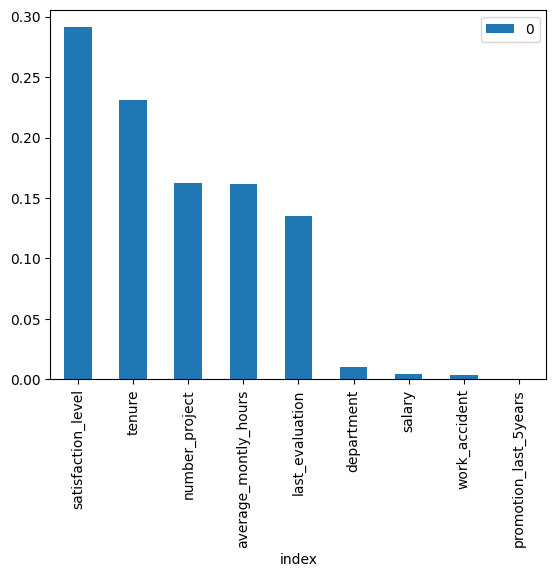

In [60]:
importance = rfc_best.feature_importances_

forest_importances = pd.DataFrame(importance , index = x.columns)

forest_importances.reset_index().sort_values(by = 0 , ascending = False).set_index('index').plot.bar()

# XG BOOST

In [61]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [62]:
xgb = XGBClassifier()

In [63]:
cv_params = {'max_depth' : [5,8,10,15,20,30,None],
            'learning_rate' : [.1,.2,.3],
            'subsample' :[.5,.7,.9]} #hyper paramater for XGBoost

In [64]:
xgb_cv = GridSearchCV(xgb , cv_params ,cv = 5 , scoring = scoring , refit = 'f1') 

In [65]:
xgb_cv.fit(x_train , y_train) #fitting the data

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [5, 8, 10, 15, 20, 30, None],
                         'subsample': [0.5, 0.7, 0.9]},
             refit='f1', scoring={'f1', 'precision', 'accuracy', 'recall'})

In [66]:
xgb_cv.best_score_ #best score in gridsearch

0.9953413630947641

In [67]:
xgb_best = xgb_cv.best_estimator_ 

In [68]:
xgb_best.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

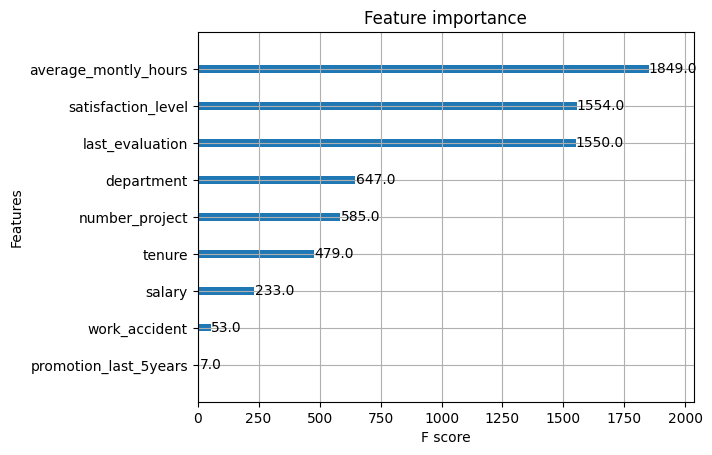

In [69]:
plot_importance(xgb_best)

In [70]:
xbg_predict = xgb_best.predict(x_test)

In [71]:
xgb_cm = confusion_matrix(y_test ,xbg_predict ) #confusion metrix for xgboost
xgb_cm

array([[2483,   17],
       [   3, 2497]], dtype=int64)

<Axes: >

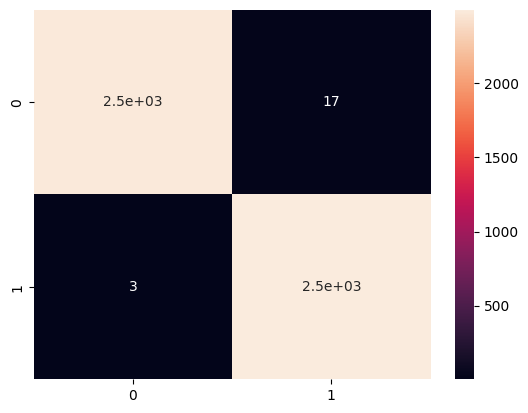

In [72]:
sns.heatmap(xgb_cm , annot = True)

In [73]:
#appending the model name to model list
model.append('XB Boost')

#calculating the accuracy score and appending the same to relavent list
accuracy_score_xgb = accuracy_score(y_test, xbg_predict)
print(f'accuracy_score : {accuracy_score_xgb}')
Accuracy_score.append(accuracy_score_xgb)

precision_score_xgb = precision_score(y_test , xbg_predict)
print(f'precision_score : {precision_score_xgb}')
Precision_score.append(precision_score_xgb)

recall_score_xgb = recall_score(y_test , xbg_predict)
print(f'recall_score : {recall_score_xgb}')
Recall_score.append(recall_score_xgb)

f1_score_xgb = f1_score(y_test , xbg_predict)
print(f'f1_score : {f1_score_xgb}')
F1_score.append(f1_score_xgb)

accuracy_score : 0.996
precision_score : 0.9932378679395386
recall_score : 0.9988
f1_score : 0.9960111687275628


In [74]:
model_performance = pd.DataFrame({'model': model,
                                'accuracy_score': Accuracy_score,
                                'precision_score' : Precision_score,
                                'recall_score' : Recall_score,
                                'F1_score' : F1_score})
model_performance

,model,accuracy_score,precision_score,recall_score,F1_score
0,Logistics Regression,0.7988,0.779148,0.8340,0.805641
1,Decision Tree Classifier,0.9868,0.975391,0.9988,0.986957
2,Random Forest Classifier,0.9814,0.992632,0.9700,0.981186
3,XB Boost,0.9960,0.993238,0.9988,0.996011
